In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("without_imbalanced_dataset.csv")
df = df.drop(columns = ["Unnamed: 0"])
df.head()

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,34.0,11,1,2,0,934.0,0,1,1,18,10,704,2.0,1,3,0
1,41.0,11,1,1,0,1352.0,1,0,1,13,4,893,2.0,0,0,0
2,57.0,11,1,1,0,495.0,0,0,1,18,7,796,4.0,0,0,1
3,37.0,10,1,3,0,650.0,1,0,0,26,4,880,1.0,0,0,0
4,29.0,9,1,2,0,265.0,1,0,1,19,7,795,2.0,0,0,0


In [4]:
df.columns

Index(['customer_age', 'job_type', 'marital', 'education', 'default',
       'balance', 'housing_loan', 'personal_loan', 'communication_type',
       'day_of_month', 'month', 'last_contact_duration',
       'num_contacts_in_campaign', 'num_contacts_prev_campaign',
       'prev_campaign_outcome', 'term_deposit_subscribed'],
      dtype='object')

In [5]:
df["having_loan"] = df["housing_loan"] + df["personal_loan"]
df.groupby(["having_loan","term_deposit_subscribed"]).count()

customer_age  job_type  marital  \
having_loan term_deposit_subscribed                                    
0           0                                7479      7479     7479   
            1                                1538      1538     1538   
1           0                               11715     11715    11715   
            1                                 876       876      876   
2           0                                2150      2150     2150   
            1                                 122       122      122   

                                     education  default  balance  \
having_loan term_deposit_subscribed                                
0           0                             7479     7479     7479   
            1                             1538     1538     1538   
1           0                            11715    11715    11715   
            1                              876      876      876   
2           0                             2150     2150     2150   
            1                              122      122      122   

                                     housing_loan  personal_loan  \
having_loan term_deposit_subscribed                                
0           0                                7479           7479   
            1                                1538           1538   
1           0                               11715          11715   
            1                                 876            876   
2           0                                2150           2150   
            1                                 122            122   

                                     communication_type  day_of_month  month  \
having_loan term_deposit_subscribed                                            
0           0                                      7479          7479   7479   
            1                                      1538          1538   1538   
1           0                                     11715         11715  11715   
            1                                       876           876    876   
2           0                                      2150          2150   2150   
            1                                       122           122    122   

                                     last_contact_duration  \
having_loan term_deposit_subscribed                          
0           0                                         7479   
            1                                         1538   
1           0                                        11715   
            1                                          876   
2           0                                         2150   
            1                                          122   

                                     num_contacts_in_campaign  \
having_loan term_deposit_subscribed                             
0           0                                            7479   
            1                                            1538   
1           0                                           11715   
            1                                             876   
2           0                                            2150   
            1                                             122   

                                     num_contacts_prev_campaign  \
having_loan term_deposit_subscribed                               
0           0                                              7479   
            1                                              1538   
1           0                                             11715   
            1                                               876   
2           0                                              2150   
            1                                               122   

                                     prev_campaign_outcome  
having_loan term_deposit_subscribed                         
0           0                                       

In [6]:
df.drop(columns = ['housing_loan', 'personal_loan'],inplace = True)

In [8]:
df.groupby(["month","term_deposit_subscribed"])["day_of_month"].count()

month  term_deposit_subscribed
0      0                           663
       1                            68
1      0                          1169
       1                           212
2      0                           126
       1                           135
3      0                          1301
       1                           274
4      0                          6902
       1                           429
5      0                          2545
       1                           256
6      0                          3334
       1                           281
7      0                          2945
       1                           315
8      0                           164
       1                           155
9      0                           223
       1                           166
10     0                          1909
       1                           195
11     0                            63
       1                            50
Name: day_of_month, dtype: int64

In [9]:
df.groupby(["day_of_month","term_deposit_subscribed"])["month"].count()

day_of_month  term_deposit_subscribed
1             0                          134
              1                           47
2             0                          557
              1                           91
3             0                          495
                                        ... 
29            1                           65
30            0                          686
              1                          143
31            0                          334
              1                           26
Name: month, Length: 62, dtype: int64

In [14]:
df[['day_of_month', 'month', 'last_contact_duration','term_deposit_subscribed']]

,day_of_month,month,last_contact_duration,term_deposit_subscribed
0,18,10,704,0
1,13,4,893,0
2,18,7,796,1
3,26,4,880,0
4,19,7,795,0
...,...,...,...,...
23875,2,1,993,0
23876,20,5,855,0
23877,23,4,883,0
23878,11,7,803,0


## Features Selection

##### Checking The Information Gain for the features

IG calculates the importance of each feature by measuring the increase in entropy when the feature is given vs. absent. Algorithm: IG(S, a) = H(S) — H(S | a) Where IG(S, a) is the information for the dataset S for the variable a for a random variable, H(S) is the entropy for the dataset before any change (described above) and H(S | a) is the conditional entropy for the dataset in the presence of variable a.


In [15]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

def FeatureInfoGain(X, y):
    bestfeatures = SelectKBest(score_func=mutual_info_classif, k='all') # k is number of features you want to select
    fit = bestfeatures.fit(X,y)
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(X.columns)
    featureScores = pd.concat([dfcolumns,dfscores],axis=1)
    featureScores.columns = ['Specs','Score']
    return featureScores

In [16]:
X = df[[x for x in df.columns.to_list() if x != 'term_deposit_subscribed']]
y = df['term_deposit_subscribed']

featureScores = FeatureInfoGain(X, y)
featureScores

,Specs,Score
0,customer_age,0.006650
1,job_type,0.010068
2,marital,0.002736
3,education,0.006063
4,default,0.000000
5,balance,0.006485
6,communication_type,0.013371
7,day_of_month,0.005379
8,month,0.026791
9,last_contact_duration,0.053621


In [17]:
featureScores.sort_values(by = "Score",ascending=False)

,Specs,Score
9,last_contact_duration,0.053621
12,prev_campaign_outcome,0.033110
8,month,0.026791
6,communication_type,0.013371
11,num_contacts_prev_campaign,0.012376
13,having_loan,0.012196
1,job_type,0.010068
10,num_contacts_in_campaign,0.008695
0,customer_age,0.006650
5,balance,0.006485


##### Observation :- As we see Information gain for all features are very less.

In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23880 entries, 0 to 23879
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_age                23880 non-null  float64
 1   job_type                    23880 non-null  int64  
 2   marital                     23880 non-null  int64  
 3   education                   23880 non-null  int64  
 4   default                     23880 non-null  int64  
 5   balance                     23880 non-null  float64
 6   communication_type          23880 non-null  int64  
 7   day_of_month                23880 non-null  int64  
 8   month                       23880 non-null  int64  
 9   last_contact_duration       23880 non-null  int64  
 10  num_contacts_in_campaign    23880 non-null  float64
 11  num_contacts_prev_campaign  23880 non-null  int64  
 12  prev_campaign_outcome       23880 non-null  int64  
 13  having_loan                 238

##### correlation method for feature selection

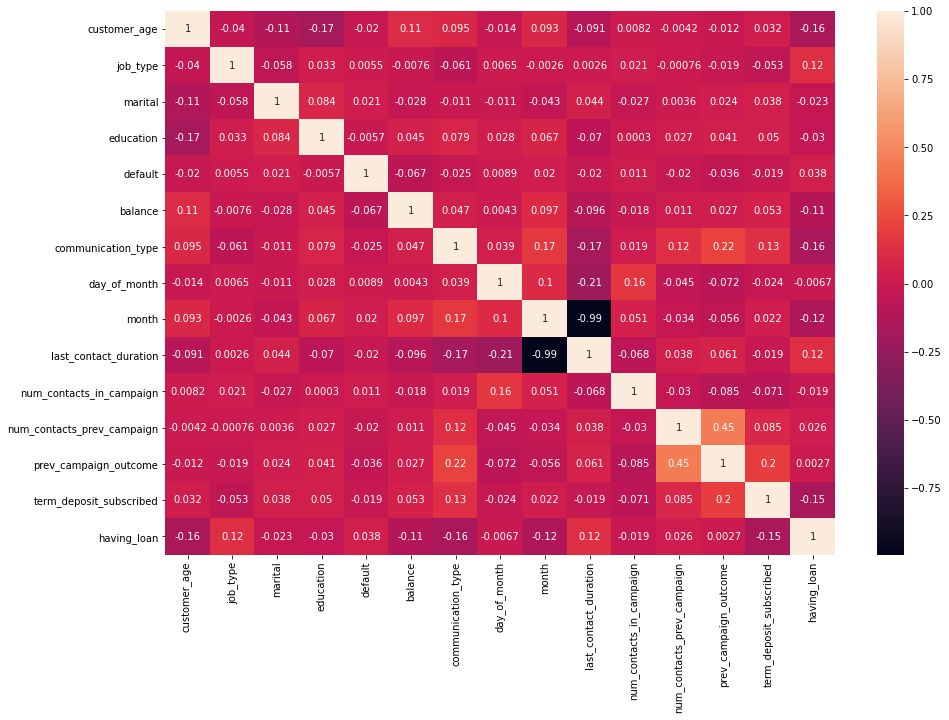

In [19]:
plt.figure(figsize=(15,10), facecolor='white')
sns.heatmap(data = df.corr(), annot=True)

In [20]:
#correlation value of 'term_deposit_subscribed' column with other columns
df.corr()['term_deposit_subscribed'][:-1].sort_values(ascending=False)

term_deposit_subscribed       1.000000
prev_campaign_outcome         0.195888
communication_type            0.133732
num_contacts_prev_campaign    0.084544
balance                       0.052716
education                     0.049678
marital                       0.038225
customer_age                  0.031811
month                         0.021667
default                      -0.018905
last_contact_duration        -0.019215
day_of_month                 -0.024477
job_type                     -0.052620
num_contacts_in_campaign     -0.071047
Name: term_deposit_subscribed, dtype: float64

##### ExtraTreesClassifier method

In [21]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

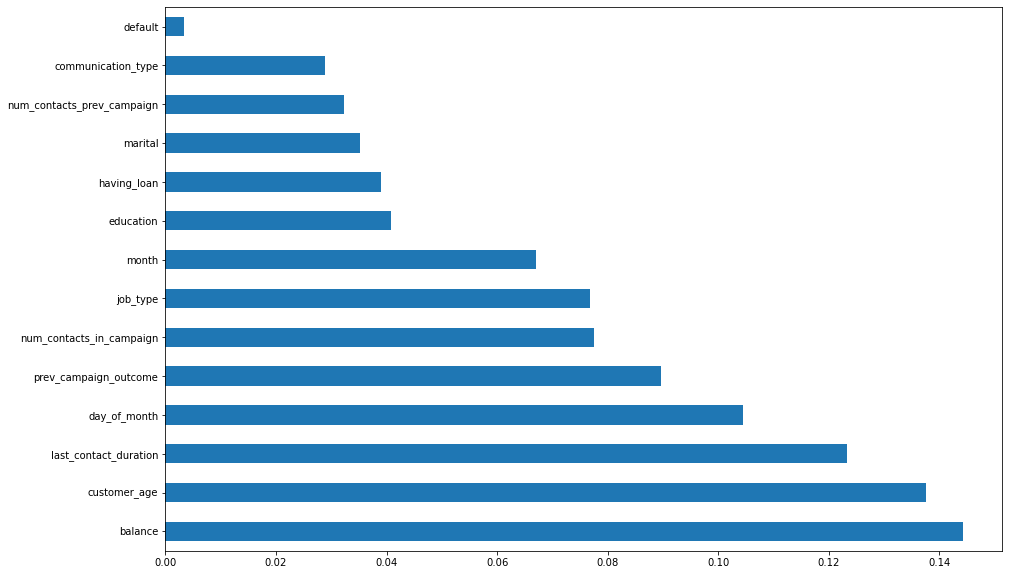

In [22]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize = (15,10))
feat_importances.nlargest(15).plot(kind="barh")
plt.show()

In [25]:
feat_importances

customer_age                  0.137496
job_type                      0.076863
marital                       0.035177
education                     0.040791
default                       0.003363
balance                       0.144180
communication_type            0.028939
day_of_month                  0.104514
month                         0.067017
last_contact_duration         0.123276
num_contacts_in_campaign      0.077458
num_contacts_prev_campaign    0.032256
prev_campaign_outcome         0.089659
having_loan                   0.039013
dtype: float64

##### Observation :- 

1) As we see Information gain of "education","day_of_month","marital","default" are almost zero(0) that means this features does not play important role in Predicating "term_deposit_subscribed"  feature information.

2) As we see "last_contact_duration" and "month" features are highly negative correlate with each other.


## Spliting Data into independent and dependent feature

In [26]:
data = df[["customer_age","job_type","balance","having_loan","last_contact_duration","prev_campaign_outcome","num_contacts_in_campaign","num_contacts_prev_campaign"]]

In [27]:
data.head()

,customer_age,job_type,balance,having_loan,last_contact_duration,prev_campaign_outcome,num_contacts_in_campaign,num_contacts_prev_campaign
0,34.0,11,934.0,1,704,3,2.0,1
1,41.0,11,1352.0,1,893,0,2.0,0
2,57.0,11,495.0,0,796,0,4.0,0
3,37.0,10,650.0,1,880,0,1.0,0
4,29.0,9,265.0,1,795,0,2.0,0


In [28]:
target = df["term_deposit_subscribed"]
target

0        0
1        0
2        1
3        0
4        0
        ..
23875    0
23876    0
23877    0
23878    0
23879    0
Name: term_deposit_subscribed, Length: 23880, dtype: int64

## Standardization

In [29]:
from sklearn.preprocessing import RobustScaler

In [30]:
rb = RobustScaler()
train_Scaled = rb.fit_transform(data)

## Spliting data into train and test data

In [31]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(train_Scaled, target, test_size=0.3, random_state=7)

In [32]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((16716, 8), (7164, 8), (16716,), (7164,))

## Model Selection

In [33]:
try:
    from sklearn.metrics import make_scorer, f1_score, accuracy_score, precision_score, recall_score
    from sklearn.model_selection import cross_validate 
    from sklearn.linear_model import LogisticRegression
    from sklearn.svm import LinearSVC
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.naive_bayes import GaussianNB
    from xgboost import XGBClassifier
except Exception as e:
    raise str(e)

In [34]:
class EvalModel:
    def __init__(self, x=None, y=None, fold=5):
        self._x = x
        self._y = y
        self._fold = fold 
        self._clstree = {'logreg': LogisticRegression, 'svm': LinearSVC,'dsctree': DecisionTreeClassifier, 'rndfclf': RandomForestClassifier,'adabst': AdaBoostClassifier, 'nvbys': GaussianNB,'knn': KNeighborsClassifier, 'xgbst': XGBClassifier}
        self._scoring = {'accuracy':make_scorer(accuracy_score), 'precision':make_scorer(precision_score),'recall':make_scorer(recall_score), 'f1_score':make_scorer(f1_score)}
    
    @staticmethod
    def _has_classifier():
        return ['logreg', 'svm', 'dsctree', 'rndfclf', 'nvbys', 'adabst', 'knn', 'xgbst']

    def _has_classifier_names(self, name):
        return {
            'logreg': 'Logistic Regression',
            'svm': 'Support Vector Classifier',
            'dsctree': 'Decision Tree',
            'rndfclf':'Random Forest',
            'nvbys':'Gaussian Naive Bayes',
            'adabst': 'AdaBoost Classifier',
            'knn': 'KNearest Classifier',
            'xgbst': 'XGBoost Classifier'
        }.get(name)

    def _perform_validate(self,nmdl=[]):
        models_scores_table = {}
        try:
            for x in nmdl:
                if x not in self._has_classifier():
                    return "{x} - key of Classifier Not Available. so please execute _has_classifier_names() method to see available classifiers".format(x=x)
                validated_obj = self._cross_validate(self._clstree.get(x)())
                models_scores_table.update({
                    self._has_classifier_names(x) : [
                                            validated_obj['test_accuracy'].mean(),
                                            validated_obj['test_precision'].mean(),
                                            validated_obj['test_recall'].mean(),
                                            validated_obj['test_f1_score'].mean()                
                                        ]
                    })
            models_scores_table = pd.DataFrame(models_scores_table, index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
                #Add 'Best Score' column
            models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
            # Return models performance metrics scores data frame
            return models_scores_table
        except Exception as e:
            raise str(e)

    def _cross_validate(self, model):
        return cross_validate(model, self._x, self._y, scoring=self._scoring, cv=self._fold)

In [35]:
EvalModel(x_train, y_train, 10)._perform_validate(['logreg', 'svm', 'dsctree', 'rndfclf', 'nvbys', 'adabst', 'knn', 'xgbst'])

[11:34:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:34:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:34:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:34:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

,Logistic Regression,Support Vector Classifier,Decision Tree,Random Forest,Gaussian Naive Bayes,AdaBoost Classifier,KNearest Classifier,XGBoost Classifier,Best Score
Accuracy,0.891601,0.895011,0.847749,0.904881,0.870063,0.906197,0.896865,0.902488,AdaBoost Classifier
Precision,0.224144,0.100000,0.293486,0.636461,0.359227,0.665001,0.527648,0.578429,AdaBoost Classifier
Recall,0.015393,0.000571,0.316039,0.226627,0.293825,0.216955,0.176532,0.265916,Decision Tree
F1 Score,0.028740,0.001136,0.303793,0.333729,0.322539,0.327019,0.264156,0.363813,XGBoost Classifier


In [45]:
import pickle

In [46]:
#saving the RobustScaler to the local file system
filename = 'finalized_scalar.pickle'
pickle.dump(rb, open(filename, 'wb'))

## Hyper Parameter Tunning for AdaBoostClassifier 

In [36]:
ada = AdaBoostClassifier()

In [37]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]

In [38]:
from sklearn.model_selection import RandomizedSearchCV
#Creating a grid of hyperparameters
grid_params = {'n_estimators': n_estimators,
              'algorithm' : ['SAMME', 'SAMME.R']
              }
#Building a 3 fold CV GridSearchCV object
grid_object = RandomizedSearchCV(estimator = ada, param_distributions = grid_params, cv = 3, n_jobs = 20,n_iter=10,verbose=2,random_state=100)
#Fitting the grid to the training data
grid_object.fit(x_train, y_train)
#Extracting the best parameters
grid_object.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


AdaBoostClassifier(algorithm='SAMME', n_estimators=2000)

In [39]:
ada_boost = AdaBoostClassifier(algorithm='SAMME', n_estimators=2000)
ada_boost.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME', n_estimators=2000)

In [40]:
y_pred = ada_boost.predict(x_test)

In [41]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
cm

array([[6305,   79],
       [ 648,  132]], dtype=int64)

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      6384
           1       0.63      0.17      0.27       780

    accuracy                           0.90      7164
   macro avg       0.77      0.58      0.61      7164
weighted avg       0.88      0.90      0.87      7164



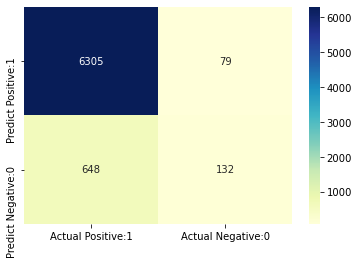

In [43]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [47]:
#saving the model to the local file system
filename = 'ada_model.pickle'
pickle.dump(ada_boost, open(filename, 'wb'))

## Hyper Parameter Tunning for DecisionTreeClassifier

In [48]:
decision_tree = DecisionTreeClassifier()

In [49]:
from sklearn.model_selection import GridSearchCV
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,15,1),
    'min_samples_split': range(2,15,1),
    'splitter' : ['best', 'random'] 
}

In [50]:
grid_search = GridSearchCV(estimator=decision_tree,
                     param_grid=grid_param,
                     cv=5,n_jobs =-1)

In [51]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 20),
                         'min_samples_leaf': range(1, 15),
                         'min_samples_split': range(2, 15),
                         'splitter': ['best', 'random']})

In [52]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 6,
 'min_samples_split': 9,
 'splitter': 'random'}

In [53]:
grid_search.best_score_

0.9086503863675723

In [54]:
decision_tree = DecisionTreeClassifier(criterion = 'gini', max_depth =5, min_samples_leaf= 6, min_samples_split= 9, splitter ='random')
decision_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=6, min_samples_split=9,
                       splitter='random')

In [55]:
# accuracy of our classification tree for train data
decision_tree.score(x_train,y_train)

0.9084709260588657

In [56]:
y_pred = decision_tree.predict(x_test)

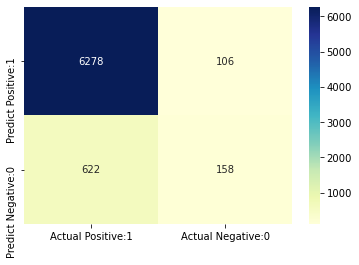

In [57]:
# visualize confusion matrix with seaborn heatmap
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

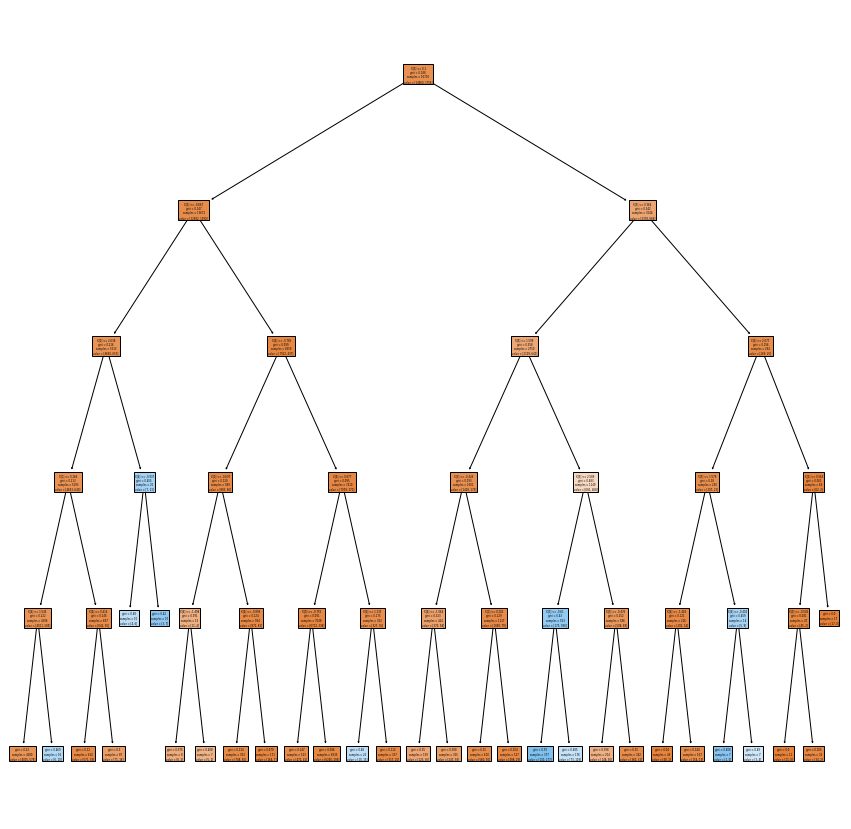

In [59]:
## Draw decision tree
from sklearn import tree
fig = plt.figure(figsize = (15,15))
tree.plot_tree(decision_tree,filled = True)
plt.show()

In [62]:
# Area Under Curve
from sklearn.metrics import roc_curve, roc_auc_score
auc = roc_auc_score(y_test, y_pred)
auc

0.59298004626952

## Hyper Parameter Tunning for XGBClassifier

In [64]:
param_grid_xgboost = {
                'learning_rate': [0.1, 0.01, 0.001, 0.05],
                'max_depth': range(1,50,5),
                'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
            }

In [66]:
grid = GridSearchCV(XGBClassifier(random_state = 30 , eval_metric='mlogloss'),param_grid_xgboost, verbose=3,cv=2,n_jobs=-1)

In [67]:
grid.fit(x_train,y_train)

Fitting 2 folds for each of 400 candidates, totalling 800 fits


GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='mlogloss', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=30,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=N

In [68]:
grid.best_params_

{'learning_rate': 0.05, 'max_depth': 1, 'n_estimators': 944}

In [69]:
xgb = XGBClassifier(random_state = 30,eval_metric='mlogloss',learning_rate=0.05, max_depth=1,n_estimators=944, n_jobs=-1 )

In [70]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=1, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=944, n_jobs=-1,
              num_parallel_tree=1, random_state=30, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [71]:
# accuracy of our classification tree for train data
xgb.score(x_train,y_train)

0.9078128738932759

In [72]:
# accuracy of our classification tree for train data
xgb.score(x_test,y_test)

0.8989391401451703

In [73]:
xgb_pred = xgb.predict(x_test)

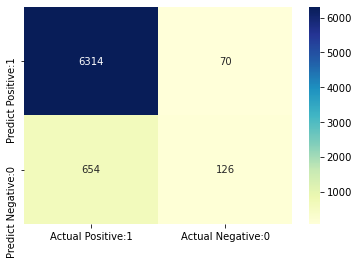

In [74]:
# visualize confusion matrix with seaborn heatmap
cm = confusion_matrix(y_test, xgb_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [75]:
#saving the model to the local file system
filename = 'xgb_model.pickle'
pickle.dump(xgb, open(filename, 'wb'))

In [76]:
#saving the model to the local file system
filename = 'decisiontree_model.pickle'
pickle.dump(decision_tree, open(filename, 'wb'))